In [27]:
import numpy as np
import math
import os
import glob
import pandas as pd
from pylab import *
from netCDF4 import Dataset
import pylab as pl
from mpl_toolkits.basemap import Basemap,shiftgrid,cm
import matplotlib.cm as cm

import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
% matplotlib inline

#Fitting the part. Th

In [28]:
import glob,csv
nc_filename=sorted(glob.glob('*.csv'))
print("found *.csv file: \n{}".format(nc_filename))

found *.csv file: 
['23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '38_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '60changed5.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '60changed6.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Atlantic_24.Th-Pa_data_July2012.csv', 'Atlantic_25.Th-Pa_data_July2012.csv', 'Atlantic_27.Th-Pa_data_July2012.csv', 'Atlantic_32.Th-Pa_data_July2012.csv', 'test.csv']


In [29]:
WLS_err1=np.empty([11,1])
WLS_coef1=np.empty([11,1])
WLS_errc=np.empty([11,1])
WLS_coefc=np.empty([11,1])
sinking_rate=np.empty([11,1])
marker=['o','o','o','o','^','s','s','s','s','s','s']

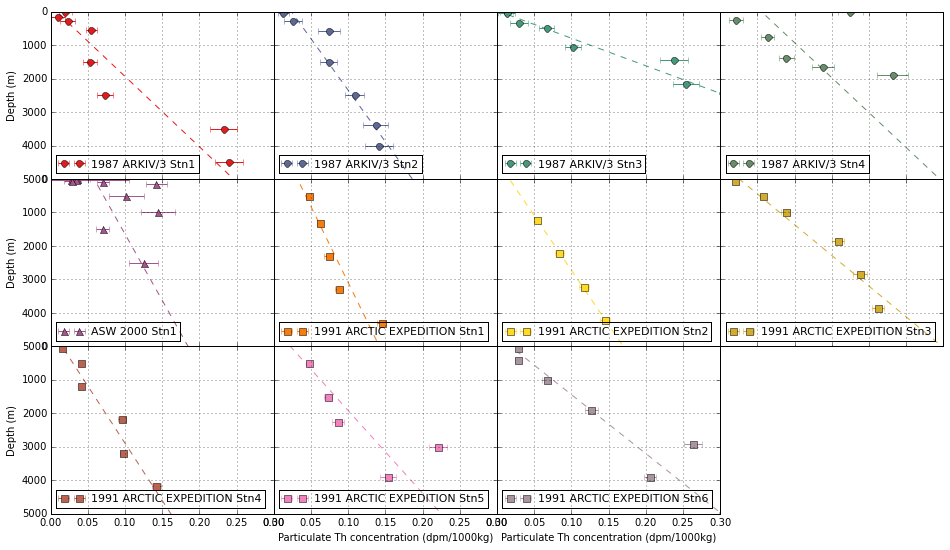

In [30]:
#ax = plt.figure(1,figsize=(10,7))
for j in range(11):
    data=pd.read_csv(nc_filename[j])
    
    y= data['depth'];
    name= data['name'][0];
    x=data['230Th part.'];
    lon = data['long.'];
    lat = data['lat.'];
    err =data['Th_part_err']
    y2 = sm.add_constant(y,prepend=False)
    mod_wls = sm.WLS(x, y2, weights=1./err)
    res_wls = mod_wls.fit()
    
    WLS_err1[j,:] = res_wls.bse[0]
    WLS_coef1[j,:] = res_wls.params[0]
    #WLS_errc[j,:] = res_wls.bse[1]
    #WLS_coefc[j,:] = res_wls.params[1]
    sinking_rate[j,:]=0.0267/res_wls.params[0]
    
    #ax = plt.subplot()
    ax = plt.figure(1,figsize=(16,9))
    ax = plt.subplot(3,4,j+1)
    cc=cm.Set1(j*25)#Paired(j*30)#Spectral(j*30)
    
    ax.plot([0, 0.3],[0, 0.3]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], '--.',c=cc,linewidth=1)
    ax.errorbar(x, y,xerr=err, fmt=marker[j],markersize=7,c=cc,label=name)
    ax.legend(loc=3,fontsize=11)
    
    ax.set_ylim([0, 5000])
    ax.set_xlim([0, 0.3])
    if j+1==1 or j+1==5 or j+1==9:
        plt.ylabel('Depth (m)')
    if j+1==10 or j+1==11: #or j+1==9:
        plt.xlabel('Particulate Th concentration (dpm/1000kg)')
#    plt.xlabel('particulate Th concentration (dpm/1000kg)')
#    plt.ylabel('Depth (m)')
    if not(j+1==9 or j+1==10 or j+1==11):
        plt.setp(ax.get_xticklabels(), visible=False)
    if not (j+1==1 or j+1==5 or j+1==9):
        plt.setp(ax.get_yticklabels(), visible=False)
    plt.gca().invert_yaxis()
    plt.grid()
    #plt.tight_layout()
    plt.subplots_adjust(wspace=.0000001, hspace=.0000001)
plt.show()

In [31]:
#for j in range(11):
#    print j+1
#    print ('================')
#    print WLS_err1[j,:]
#    print WLS_coef1[j,:]
#    print (' ')
#    print WLS_errc[j,:]
#    print WLS_coefc[j,:]

#fitting the diss. Th

####(1) Change into fit Q-C{1}K{-1}-K{-1}Qz/S

In [32]:
WLS_err2=np.empty([11,1])
Kvalue=np.empty([11,1])
WLS_coef2=np.empty([11,1])

('1987 ARKIV/3 Stn1', 'k_th', -1.6142362452696113)
('1987 ARKIV/3 Stn2', 'k_th', -0.37268212544096768)
('1987 ARKIV/3 Stn3', 'k_th', -1.7972686598706087)
('1987 ARKIV/3 Stn4', 'k_th', -0.60369411986186461)
('ASW 2000 Stn1', 'k_th', -0.26588909749656098)
('1991 ARCTIC EXPEDITION Stn1', 'k_th', -0.43746290446755692)
('1991 ARCTIC EXPEDITION Stn2', 'k_th', -0.50846028786872455)
('1991 ARCTIC EXPEDITION Stn3', 'k_th', -0.20289592862273523)
('1991 ARCTIC EXPEDITION Stn4', 'k_th', -0.50658506637182266)
('1991 ARCTIC EXPEDITION Stn5', 'k_th', -1.2655250037283599)
('1991 ARCTIC EXPEDITION Stn6', 'k_th', -2.0193295659887922)


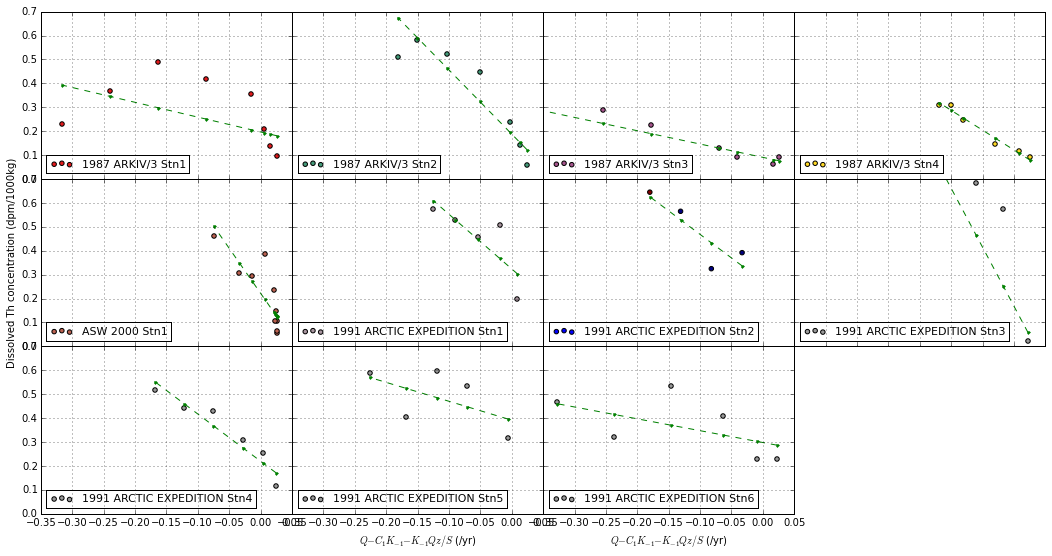

In [33]:
for j in range(11):
    data=pd.read_csv(nc_filename[j])
    
    y= data['depth'];
    x= data['230Th diss.'];
    name= data['name'][0];
    lon = data['long.'];
    lat = data['lat.'];
    err =data['Th_diss_err']
    y2=np.empty(len(x))
    
    for k in range (len(x)):
        y2[k]=(0.0267-WLS_coef1[j,:]*1.6)-(0.0267*1.6/sinking_rate[j])*y[k]
    y3 = sm.add_constant(y2,prepend=False)
    mod_wls2 = sm.WLS(x,y3, weights=1./err)
    res_wls2 = mod_wls2.fit()
    
    ax = plt.figure(1,figsize=(18,9))
    ax = plt.subplot(3,4,j+1)
    ax.plot(y2, res_wls2.fittedvalues, 'g--.')
    ax.scatter(y2,x,c=cm.Set1(j*50),label=name)
    ax.legend(loc=3,fontsize=11)
    print(name,'k_th',1/res_wls2.params[0])

    ax.set_ylim([0, 0.7])
    ax.set_xlim([-0.35, 0.05])
    if j+1==5: #or j+1==5 or j+1==9:
        plt.ylabel('Dissolved Th concentration (dpm/1000kg)')
    if j+1==10 or j+1==11: #or j+1==9:
        plt.xlabel('$Q-C_{1}K_{-1}-K_{-1}Qz/S$ (/yr)')
    if not(j+1==9 or j+1==10 or j+1==11):
        plt.setp(ax.get_xticklabels(), visible=False)
    if not (j+1==1 or j+1==5 or j+1==9):
        plt.setp(ax.get_yticklabels(), visible=False)
    plt.grid()

    plt.subplots_adjust(wspace=.0000001, hspace=.0000001)   
plt.show()

####(2)The  Original one (Fit z)

('1987 ARKIV/3 Stn1', 'p_value', 0.15880930363680917, 'C', 0.1802099815310835)
('Kvalue', array([ 1.20298749]), 'Q/K-J*res_wls.params[1]/K', array([-0.01322301]))
('1987 ARKIV/3 Stn2', 'p_value', 0.0044579881614336134, 'C', 0.1161311023419955)
('Kvalue', array([ 0.4065888]), 'Q/K-J*res_wls.params[1]/K', array([-0.03912334]))
('1987 ARKIV/3 Stn3', 'p_value', 0.001698334416465811, 'C', 0.075783729429979421)
('Kvalue', array([ 0.52508726]), 'Q/K-J*res_wls.params[1]/K', array([-0.03029422]))
('1987 ARKIV/3 Stn4', 'p_value', 0.00048616402034254696, 'C', 0.077323402281921083)
('Kvalue', array([ 0.44710313]), 'Q/K-J*res_wls.params[1]/K', array([-0.03557817]))
('ASW 2000 Stn1', 'p_value', 0.0034923232043977794, 'C', 0.12146410428765789)
('Kvalue', array([ 0.37334893]), 'Q/K-J*res_wls.params[1]/K', array([-0.04260655]))
('1991 ARCTIC EXPEDITION Stn1', 'p_value', 0.098976665515364479, 'C', 0.26294142043144919)
('Kvalue', array([ 0.70447783]), 'Q/K-J*res_wls.params[1]/K', array([-0.02258]))
('199

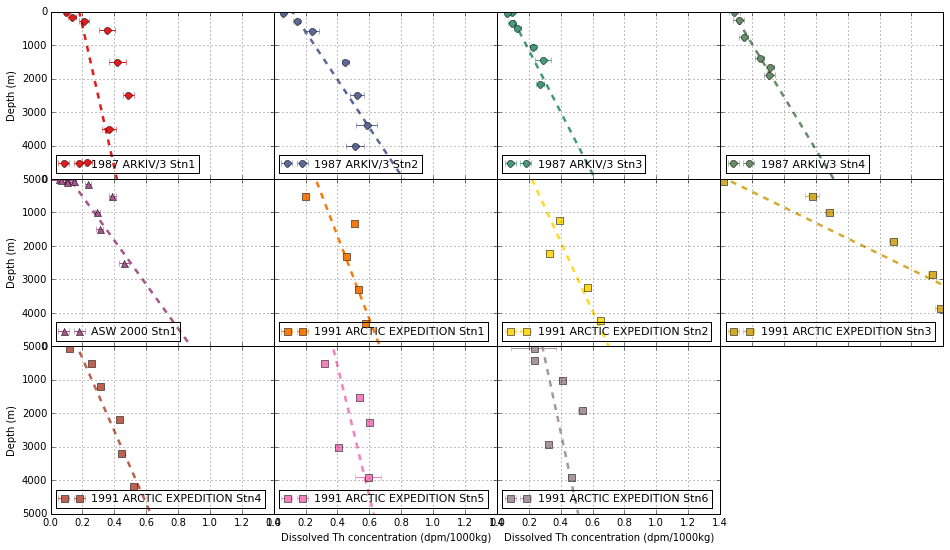

In [34]:
#ax = plt.figure(1,figsize=(10,7))
for j in range(11):
    data=pd.read_csv(nc_filename[j])
    
    y= data['depth'];
    x= data['230Th diss.'];
    name= data['name'][0];
    lon = data['long.'];
    lat = data['lat.'];
    err =data['Th_diss_err']
    y2 = sm.add_constant(y,prepend=False)
    mod_wls2 = sm.WLS(x, y2, weights=1./err)
    res_wls2 = mod_wls2.fit()
    
    WLS_err2[j,:] = res_wls2.bse[0]
    Kvalue[j,:]=1*res_wls.params[0]/res_wls2.params[0]
    WLS_coef2[j,:] = res_wls2.params[0]
    
#    ax = plt.subplot()
    ax = plt.figure(1,figsize=(16,9))
    ax = plt.subplot(3,4,j+1)
    ax.plot([0, 5000],[0, 5000]/res_wls2.params[0]-res_wls2.params[1]/res_wls2.params[0], '--.',c=cm.Set1(j*25),linewidth=2.5)
    ax.errorbar(x, y,xerr=err, fmt=marker[j],markersize=7,c=cm.Set1(j*25),label=name)
    ax.legend(loc=3,fontsize=11)
    print (name,'p_value',res_wls2.pvalues[0], 'C',res_wls2.params[1])
    print('Kvalue',Kvalue[j,:],'Q/K-J*res_wls.params[1]/K',0.00246/Kvalue[j,:]-1.0*res_wls.params[1]/Kvalue[j,:]) ####new
    
    ax.set_ylim([0, 5000])
    ax.set_xlim([0, 1.4])
    if j+1==1 or j+1==5 or j+1==9:
        plt.ylabel('Depth (m)')
    if j+1==10 or j+1==11: #or j+1==9:
        plt.xlabel('Dissolved Th concentration (dpm/1000kg)')
    if not(j+1==9 or j+1==10 or j+1==11):
        plt.setp(ax.get_xticklabels(), visible=False)
    if not (j+1==1 or j+1==5 or j+1==9):
        plt.setp(ax.get_yticklabels(), visible=False)
    plt.gca().invert_yaxis()
    plt.grid()
    #plt.tight_layout()
    plt.subplots_adjust(wspace=.0000001, hspace=.0000001)   
plt.show()

# WLS: sinking rate and the ice concentration

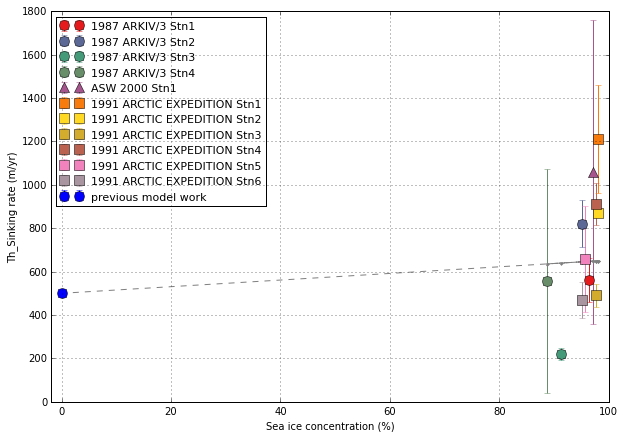

In [35]:
i=np.empty([11,1])
#for j in range(11):
#    data=pd.read_csv(nc_filename[j])
#    i[j,:]= data['ice'][0];
i= np.array([96.4,95.2,91.2,88.8,97.2,98,98,97.6,97.6,95.6,95.2])
    
err1=(WLS_err1/WLS_coef1)*1/WLS_coef1*0.0267
#((WLS_err1/WLS_coef1)**2)**(0.5)
sinking_rate=numpy.append(sinking_rate,500)
i=numpy.append(i,0)
err1=numpy.append(err1,0.0001)
i2 = sm.add_constant(i,prepend=False)
mod_wls3 = sm.WLS(sinking_rate,i2,weights=1./err1) #Is it the real error?
res_wls3 = mod_wls3.fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, res_wls3.fittedvalues, '--.',color='grey')
for j in range(11):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],sinking_rate[j],yerr=err1[j],fmt=marker[j],markersize=10,c=cm.Set1(j*25),label=name)

ax.errorbar(i[-1],sinking_rate[-1], yerr=err1[-1], fmt='o',markersize=10,c='blue',label='previous model work')
ax.legend(loc=0, fontsize=11)#,bbox_to_anchor=(1.45,1))
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Sinking rate (m/yr)')

#ax.set_ylim([0, 5000])
ax.set_xlim([-2, 100])
plt.grid()
plt.show()

In [36]:
#print sinking_rate
#print err1
#print x
#print y

In [37]:
print res_wls3.summary()

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.219
Model:                            WLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.804
Date:                Fri, 29 May 2015   Prob (F-statistic):              0.125
Time:                        13:07:31   Log-Likelihood:                -58.976
No. Observations:                  12   AIC:                             122.0
Df Residuals:                      10   BIC:                             122.9
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.5266      0.912      1.675      0.125        -0.505     3.558
const        499.9999      0.361   1384.161      0.0

# WLS: K value and the ice concentration

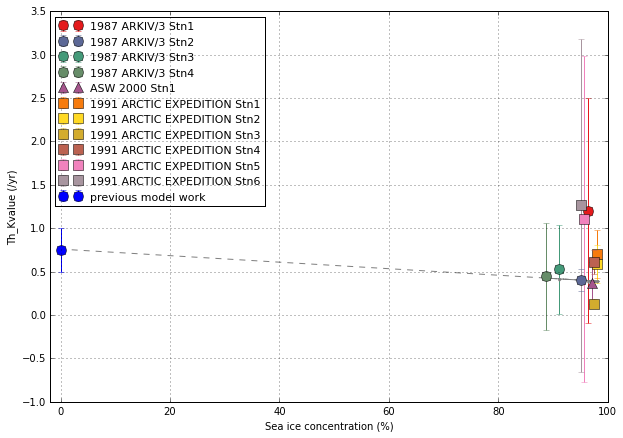

In [38]:
err2= ((WLS_err1/WLS_coef1)+(WLS_err2/WLS_coef2))* WLS_coef1/WLS_coef2*1.6# error of k value K-1=1
#(WLS_coef1**(-4)*(WLS_coef2**(-2))*(WLS_err1)**2+WLS_coef2**(-4)*(WLS_coef1**(-2))*(WLS_err2)**2)**(0.5)
#((WLS_err1/WLS_coef1)**2+(WLS_err2/WLS_coef2)**2)**(0.5) # error of k value K-1=1

Kvalue=numpy.append(Kvalue,0.75)
err2=numpy.append(err2,0.25)

mod_wls4 = sm.WLS(Kvalue, i2, weights=1./err2)
res_wls4 = mod_wls4.fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, res_wls4.fittedvalues,  '--.',color='grey')
for j in range(11):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],Kvalue[j],yerr=err2[j],fmt=marker[j],markersize=10,c=cm.Set1(j*25),label=name)
errorbar(i[-1],Kvalue[-1], yerr=err2[-1], fmt='o',markersize=10,c='blue',label='previous model work')
ax.legend(loc=0,fontsize=11)
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Kvalue (/yr)')
ax.set_xlim([-2, 100])
plt.grid()
plt.show()

In [39]:
print Kvalue
print i
print err2

[ 1.20298749  0.4065888   0.52508726  0.44710313  0.37334893  0.70447783
  0.58910897  0.13207244  0.61458902  1.10689995  1.26208098  0.75      ]
[ 96.4  95.2  91.2  88.8  97.2  98.   98.   97.6  97.6  95.6  95.2   0. ]
[ 1.2920743   0.12554594  0.51265826  0.617785    0.24126913  0.27494682
  0.22206959  0.04930515  0.13724532  1.87354832  1.91470578  0.25      ]


In [40]:
print res_wls4.summary() 

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.125
Model:                            WLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.433
Date:                Fri, 29 May 2015   Prob (F-statistic):              0.259
Time:                        13:07:32   Log-Likelihood:                -9.5505
No. Observations:                  12   AIC:                             23.10
Df Residuals:                      10   BIC:                             24.07
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0038      0.003     -1.197      0.259        -0.011     0.003
const          0.7590      0.293      2.591      0.0

In [41]:
print(res_wls4.f_test([1,-1]))

<F test: F=array([[ 6.64349146]]), p=[[ 0.02753428]], df_denom=10, df_num=1>


In [42]:
import csv
with open('test.csv', 'w') as fp:
    a = csv.writer(fp, delimiter=',')
    data = [[1.20298749, 96.4,1.2920743,0.058],
            [0.40658880, 85.2,0.12554594, 0.058],
            [0.52508726, 91.2,0.51265826, 0.058],
            [0.44710313, 88.8,0.617785, 0.058],
            [0.37334893, 9.8,0.24126913, 0.058],
            [0.70447783, 9.8,0.27494682, 0.058],
            [0.58910897, 97.6,0.22206959, 0.058],
            [0.13207244, 97.6,0.04930515, 0.058],
            [0.61458902, 95.6,0.13724532, 0.058],
            [1.10689995, 95.2,1.87354832, 0.058],
            [1.26208098, 85.2,1.91470578, 0.058],
            [0.75, 0,0.02 , 0.058]]
#    data = [[1.20298749, 90,1.2920743,0.058],
#            [0.40658880, 80,0.12554594, 0.058],
#            [0.52508726, 70,0.51265826, 0.058],
#            [0.44710313, 80,0.617785, 0.058],
#            [0.37334893, 90,0.24126913, 0.058],
#            [0.70447783, 80,0.27494682, 0.058],
#            [0.58910897, 70,0.22206959, 0.058],
#            [0.13207244, 70,0.04930515, 0.058],
#            [0.61458902, 80,0.13724532, 0.058],
#            [1.10689995, 90,1.87354832, 0.058],
#            [1.26208098, 80,1.91470578, 0.058],
#            [0.75, 0,0.02 , 0.058]]
    a.writerows(data)

In [43]:
data=pd.read_csv('test.csv',header=None,names=['k','ice','err','k2'])
print data

           k   ice       err     k2
0   1.202987  96.4  1.292074  0.058
1   0.406589  85.2  0.125546  0.058
2   0.525087  91.2  0.512658  0.058
3   0.447103  88.8  0.617785  0.058
4   0.373349   9.8  0.241269  0.058
5   0.704478   9.8  0.274947  0.058
6   0.589109  97.6  0.222070  0.058
7   0.132072  97.6  0.049305  0.058
8   0.614589  95.6  0.137245  0.058
9   1.106900  95.2  1.873548  0.058
10  1.262081  85.2  1.914706  0.058
11  0.750000   0.0  0.020000  0.058


In [44]:
from scipy import stats
from statsmodels.stats.anova import anova_lm 
from statsmodels.formula.api import wls

#anova_results=anova_lm(wls('k~C(ice)',data).fit())
#print anova_results

In [45]:
anova_results=anova_lm(wls('k~k2',data).fit())
print ('Without slope')
print anova_results
print ("    ")
print ('With slope (originally)')
print (' F:1.443, PR(>F):0.259')

Without slope
          df    sum_sq   mean_sq         F    PR(>F)
k2         1  0.302738  0.302738  2.449166  0.145883
Residual  11  1.359695  0.123609       NaN       NaN
    
With slope (originally)
 F:1.443, PR(>F):0.259


# map

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


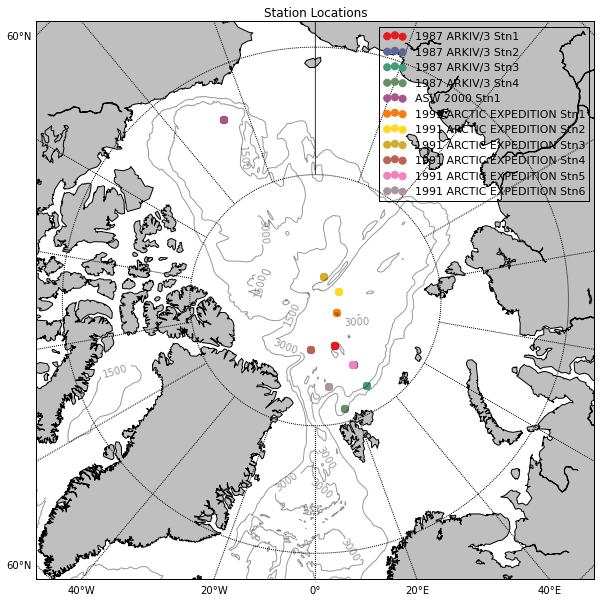

In [47]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

# create Basemap instance.
m = Basemap(projection='npstere',boundinglat=68,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

nc_filename=sorted(glob.glob('*.csv'))
for j in range(11):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    name= data['name'][0];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    m.scatter(x,y,color=cm.Set1(j*25),s=50,label=name)


url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  

m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

plt.title("Station Locations")
plt.legend(loc=1,fontsize=11)

plt.show()

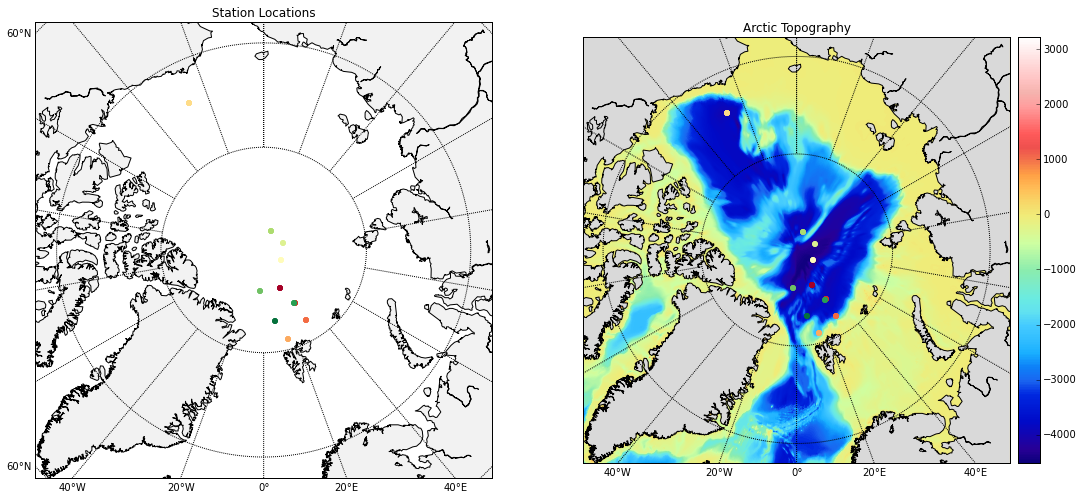

In [48]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(121)

# create Basemap instance.
m = Basemap(projection='npstere',boundinglat=68,lon_0=0,resolution='l')
for j in range(11):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    m.scatter(x,y,color=cm.RdYlGn(j*25))
    
plt.title("Station Locations")
m.drawcoastlines()
m.fillcontinents(color = '0.95')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

ax = fig.add_subplot(122)
url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)

topoin = etopodata.variables['ROSE'][:]
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
# shift data so lons go from -180 to 180 instead of 20 to 380.
topoin,lons = shiftgrid(180.,topoin,lons,start=False)
m = Basemap(projection='npstere',boundinglat=68,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

for j in range(11):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    m.scatter(x,y,color=cm.RdYlGn(j*25))

nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)    
from mpl_toolkits.basemap import cm    
im = m.imshow(topodat,cm.GMT_haxby)
cb = m.colorbar(im,"right", size="5%", pad='2%')
plt.title("Arctic Topography")
plt.show()